# Titanic Survival Prediction Challenge 🚢

In [2]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 495.5 kB/s eta 0:05:03
   ---------------------------------------- 0.1/150.0 MB 1.2 MB/s eta 0:02:03
   ---------------------------------------- 0.2/150.0 MB 1.1 MB/s eta 0:02:15
   ---------------------------------------- 0.3/150.0 MB 1.7 MB/s eta 0:01:30
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:11
   ---------------------------------------- 0.7/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 0.9/150.0 MB 2.7 MB/s eta 0:00:57
   ---------------------------------------- 1.2/150.0 MB 2.9 MB/s eta 0:00:51
   ---------------------------------------- 1.4/150.0 MB 3.2 MB/s eta 0:00:47
   ---------------------------------------- 1.6/150.0 MB 3.4 MB/s eta 0:00:44
    --------------------------------------- 1.9/150.0 MB 3.6 MB/s eta 0:00:4

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandasgui import show
import matplotlib.pyplot as plt
from scipy.stats import skew 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Load the datasets
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

In [5]:
# Make copies to work with
train = train_df.copy()
test = test_df.copy()

In [6]:
# Displaying the first few rows of the training set
train.head(3)

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC"
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal


In [5]:
test.head(3)

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON"
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,NaN,NaN,"Boston, MA"
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN


# Exploration & Cleaning

In [6]:
# Print the shape of the DataFrames
print(train.shape)
print(test.shape)

(916, 15)
(393, 15)


- we have 15 columns in both data

In [7]:
# Check if there are any duplicates in the DataFrames
print(train.duplicated().any())
print(test.duplicated().any())

False
False


In [8]:
# Count number of duplicate rows
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


- don't have duplicate rows

In [9]:
#Check trailing spaces
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass\t', 'Survival  ', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


- need to strip column names

In [10]:
# Strip spaces from column names
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

#Check trailing spaces again
print(train.columns.tolist())
print(test.columns.tolist())

['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']
['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'Home_Dest']


In [11]:
# Displaying dataset information to understand data types and missing values
print("Train Dataset Info:")
print(train.info())

print("\nTest Dataset Info:")
print(test.info())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass       916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          724 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Ticket       916 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        197 non-null    object 
 11  Embarked     915 non-null    object 
 12  Boat         345 non-null    object 
 13  Body         81 non-null     float64
 14  Home_Dest    515 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 107.5+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392


- have missing values in columns

In [12]:
# Summary for categorical columns
categorical_summary = train.describe(include=['object'])
print("\nCategorical Columns Summary:\n", categorical_summary)


Categorical Columns Summary:
                         Name   Sex    Ticket Cabin Embarked Boat     Home_Dest
count                    916   916       916   197      915  345           515
unique                   914     2       699   140        3   24           288
top     Connolly, Miss. Kate  male  CA. 2343    G6        S    C  New York, NY
freq                       2   576         7     5      645   30            45


In [13]:
# Check unique values in each categorical column
print("Unique values in 'Sex':", train["Sex"].unique())
print("Unique values in 'Pclass':", train["Pclass"].unique())

Unique values in 'Sex': ['female' 'male']
Unique values in 'Pclass': [3 1 2]


In [14]:
# Check for unusual values in numerical columns
print(train['Age'].describe())
print("\n")
print(train['Fare'].describe())

count    724.000000
mean      29.243554
std       14.164649
min        0.166700
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


count    915.000000
mean      32.022576
std       48.378494
min        0.000000
25%        7.895800
50%       14.500000
75%       30.000000
max      512.329200
Name: Fare, dtype: float64


In [15]:
# Checking basic statistics of numerical columns
train.describe()

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare,Body
count,916.000000,916.000000,916.000000,724.000000,916.000000,916.000000,915.000000,81.000000
mean,458.500000,2.307860,0.391921,29.243554,0.459607,0.381004,32.022576,162.604938
std,264.570721,0.829236,0.488446,14.164649,0.974823,0.875925,48.378494,101.425919
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,229.750000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,70.000000
50%,458.500000,3.000000,0.000000,28.000000,0.000000,0.000000,14.500000,156.000000
75%,687.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.000000,259.000000
max,916.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [16]:
# Check the data types of the columns
print(train.dtypes)
print("\n")
print(test.dtypes)

PassengerId      int64
Pclass           int64
Survival         int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Boat            object
Body           float64
Home_Dest       object
dtype: object


PassengerId      int64
Pclass           int64
Survival         int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Boat            object
Body           float64
Home_Dest       object
dtype: object


## Data visualisation

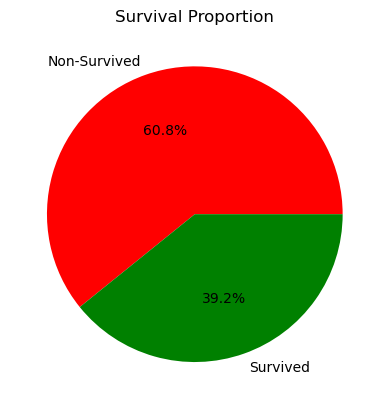

In [17]:
survival_counts = train['Survival'].value_counts()
plt.pie(survival_counts, labels=['Non-Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Survival Proportion')
plt.show()

- 60 % of passangers died which is greater than survived passangers number

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


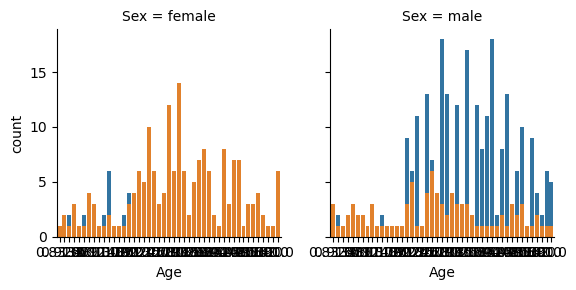

In [18]:
# Example for categorical variables using FacetGrid
g = sns.FacetGrid(train, col="Sex", hue="Survival")
g.map(sns.countplot, "Age")
plt.show()

-  gender and age played a significant role in survival, possibly due to the "women and children first" policy.

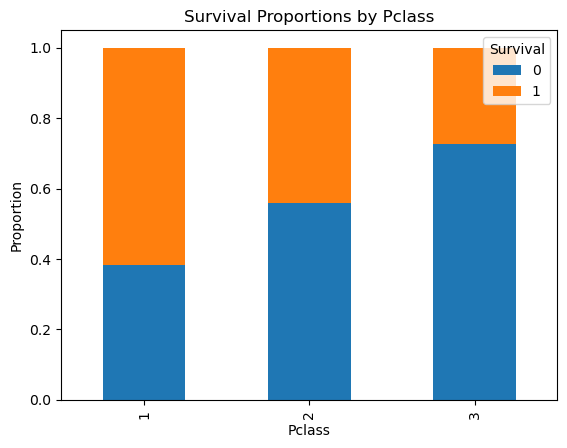

In [19]:
# Example for a categorical variable (e.g., 'Pclass')
pclass_survival = pd.crosstab(train['Pclass'], train['Survival'], normalize='index')
pclass_survival.plot(kind='bar', stacked=True)
plt.title('Survival Proportions by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Proportion')
plt.show()

-  More 1st-class passengers survived compared to other classes : higher-class passengers had a better chance of survival, likely due to better access to lifeboats and priority treatment.
- Most 3rd-class passengers died : lower-class passengers had a much lower survival rate.
- 2nd-class passengers had a mix of survival and death but still fared worse than 1st class

## Missing values

In [20]:
# Check missing values in train dataset
print("Missing values in Train dataset:")
print(train.isnull().sum())

# Check missing values in test dataset
print("\nMissing values in Test dataset:")
print(test.isnull().sum())

Missing values in Train dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Boat           571
Body           835
Home_Dest      401
dtype: int64

Missing values in Test dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         1
Boat           252
Body           353
Home_Dest      163
dtype: int64


<Figure size 1200x600 with 0 Axes>

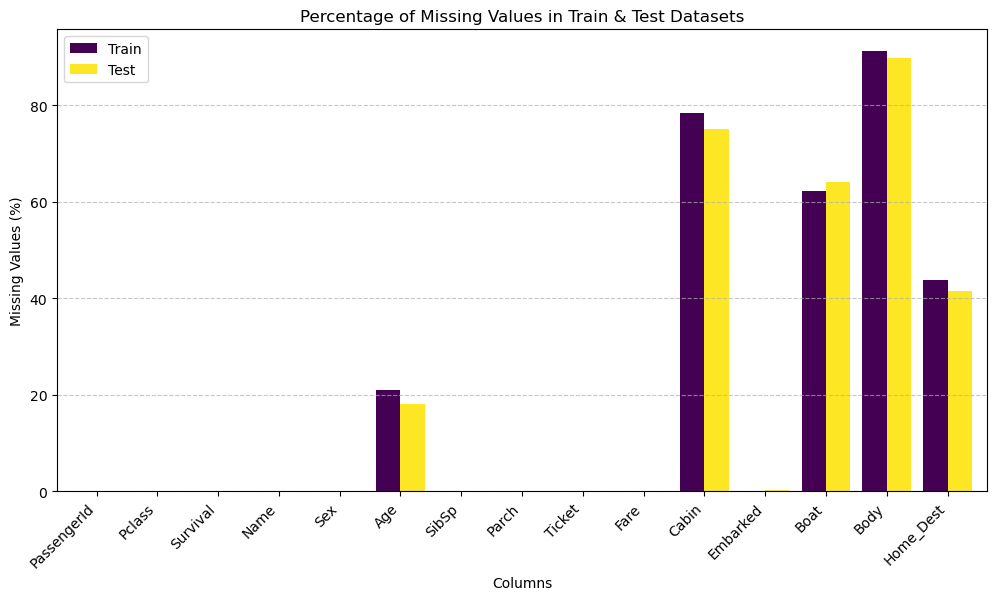

In [21]:
# Calculate missing values percentage for train and test
missing_train = train.isnull().sum() / len(train) * 100
missing_test = test.isnull().sum() / len(test) * 100

# Combine into a DataFrame
missing_data = pd.DataFrame({"Train": missing_train, "Test": missing_test})

# Plot
plt.figure(figsize=(12, 6))
missing_data.plot(kind="bar", figsize=(12, 6), colormap="viridis", width=0.8)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Missing Values (%)")
plt.xlabel("Columns")
plt.title("Percentage of Missing Values in Train & Test Datasets")
plt.legend(["Train", "Test"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- Body (~95% missing): Likely not useful for survival prediction.

- Cabin (~75-80% missing).

- Boat (~60% missing): This indicates whether someone got on a lifeboat, which is directly related to survival. However, since it’s missing in many cases, it might not be reliable.

- Age (~20% missing): Since age is important for survival (children had a higher chance), thonk to Filling missing values.

- Home/Dest (~40% missing): This column is not directly related to survival, so it's not very useful. 

## Cabins

In [22]:
train['Cabin'].unique()

array(['G6', 'C6', nan, 'D7', 'C70', 'B96 B98', 'T', 'C92', 'B77', 'C123',
       'E44', 'C22 C26', 'F4', 'B5', 'B35', 'C31', 'D28', 'E58',
       'B51 B53 B55', 'D34', 'D21', 'E34', 'B28', 'B58 B60', 'E68', 'E31',
       'C50', 'C62 C64', 'F E46', 'D15', 'F33', 'C89', 'B102', 'A36',
       'E101', 'C2', 'D19', 'F E57', 'C106', 'A6', 'E60', 'E8', 'C47',
       'B18', 'C93', 'A9', 'C116', 'C55 C57', 'E52', 'C52', 'A11', 'B45',
       'C53', 'D33', 'F2', 'D20', 'B101', 'C51', 'C95', 'C78', 'D50',
       'A19', 'D36', 'D9', 'B24', 'C7', 'D', 'E121', 'C23 C25 C27', 'C85',
       'B20', 'C125', 'E36', 'B10', 'C87', 'C101', 'A16', 'C83', 'C68',
       'A34', 'B36', 'F', 'F G73', 'C128', 'B22', 'B26', 'C54', 'C148',
       'E24', 'A14', 'C30', 'C39', 'B82 B84', 'A24', 'D17', 'C99', 'E10',
       'B61', 'C124', 'D46', 'E17', 'B69', 'B37', 'A23',
       'B57 B59 B63 B66', 'A31', 'B79', 'B19', 'B52 B54 B56', 'D11',
       'E38', 'C80', 'E33', 'B49', 'C82', 'C45', 'B86', 'C111', 'C105',
       'D

In [11]:
# Extract the first letter of the cabin (Deck A, B, C, etc.)
train['Deck'] = train['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else np.nan)
test['Deck'] = test['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else np.nan)

In [24]:
train.head(3)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest,Deck
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN,G
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC",C
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal,NaN


In [25]:
test.head(3)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest,Deck
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,NaN,NaN,"Ottawa, ON",NaN
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,F2,S,NaN,NaN,"Boston, MA",F
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,C97,S,8,NaN,NaN,C


In [26]:
train.Deck.value_counts()

Deck
C    61
B    45
D    28
E    26
A    16
F    15
G     5
T     1
Name: count, dtype: int64

In [27]:
test.Deck.value_counts()

Deck
C    33
B    20
D    18
E    15
F     6
A     6
Name: count, dtype: int64

In [28]:
# Group by 'Deck' and 'Pclass' and get the count of passengers
Cabin_pclass_distribution = train.groupby(['Deck', 'Pclass']).size().unstack(fill_value=0)

# Display the result
print(Cabin_pclass_distribution)

Pclass   1  2  3
Deck            
A       16  0  0
B       45  0  0
C       61  0  0
D       24  4  0
E       20  3  3
F        0  9  6
G        0  0  5
T        1  0  0


In [29]:
# Group by 'Deck' and 'Pclass' and get the count of passengers
Cabin_pclass_distribution2 = test.groupby(['Deck', 'Pclass']).size().unstack(fill_value=0)

# Display the result
print(Cabin_pclass_distribution2)

Pclass   1  2  3
Deck            
A        6  0  0
B       20  0  0
C       33  0  0
D       16  2  0
E       14  1  0
F        0  4  2


AttributeError: 'numpy.int64' object has no attribute 'startswith'

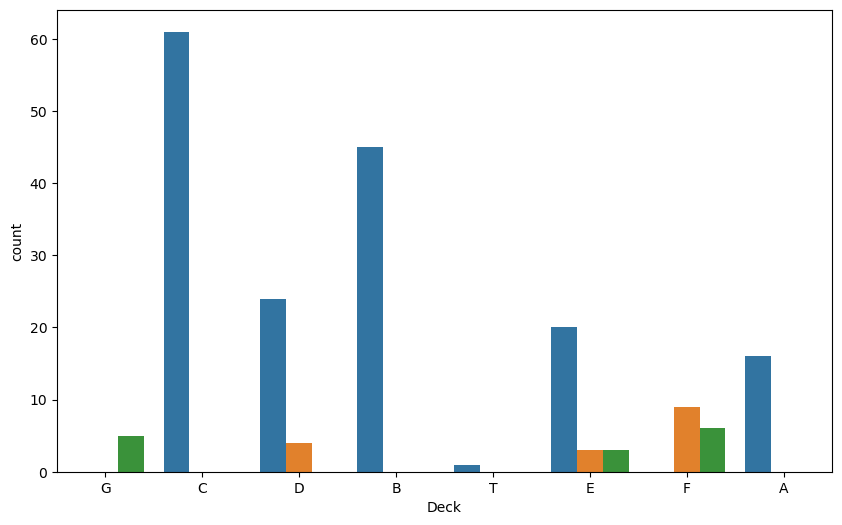

In [30]:
# Create a bar plot to visualize which Pclass attended which deck
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Deck', hue='Pclass')

# Add labels and title
plt.title('Distribution of Pclass across Different Decks')
plt.xlabel('Deck')
plt.ylabel('Count of Passengers')

# Show the legend with labels for Pclass
plt.legend(title='Pclass', loc='upper right')

# Show the plot
plt.show()

- Pclass = 1: Most likely to have decks A, B, C, E.

- Pclass = 2: Likely to have decks D, E, F.

- Pclass = 3: Likely to have decks E, F, G.

In [31]:
# Count the number of passengers for each Pclass in the train dataset
train_pclass_count = train['Pclass'].value_counts()
print(train_pclass_count)

Pclass
3    499
1    217
2    200
Name: count, dtype: int64


In [32]:
# Count the number of passengers for each Pclass in the test dataset
test_pclass_count = test['Pclass'].value_counts()
print(test_pclass_count)

Pclass
3    210
1    106
2     77
Name: count, dtype: int64


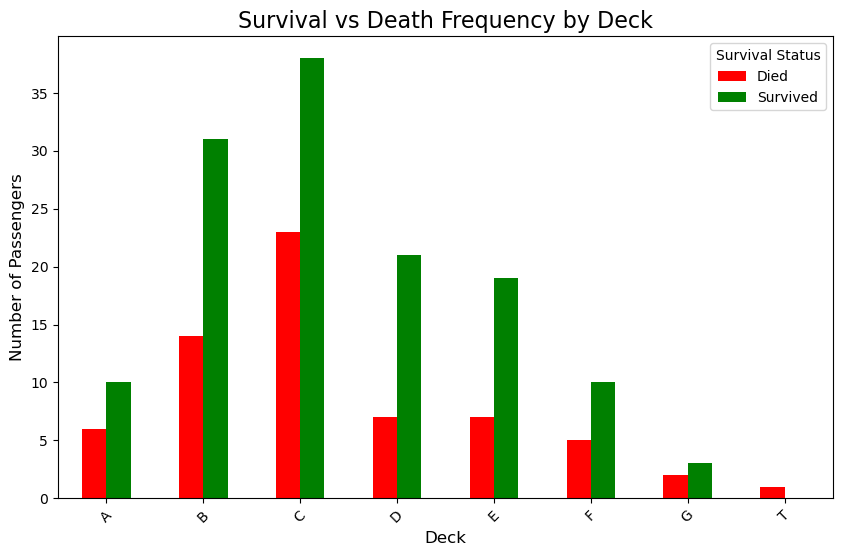

In [23]:
# Group by Deck and Survived and get the count of each combination
deck_survival_count = train.groupby(['Deck', 'Survival']).size().unstack(fill_value=0)

# Plotting the survival count for each Deck
deck_survival_count.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'green'])

# Adding titles and labels
plt.title('Survival vs Death Frequency by Deck', fontsize=16)
plt.xlabel('Deck', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Died', 'Survived'], title='Survival Status')
plt.show()

- For many passengers who died, deck information is missing -  the available deck data is biased toward survivors.
- All passengers from T deck died.
- B, C, D, and E decks had a high number of passengers, and survival rates were higher than deaths.

#### Add Family Size Column

In [12]:
# create the FamilySize column by adding SibSp and Parch:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1  # +1 for the passenger themselves
test['FamilySize'] = test['Parch'] + test['SibSp'] + 1  # +1 for the passenger themselves

In [13]:
train['FamilySize'].unique()

array([ 3,  1,  2,  4,  5,  7, 11,  6,  8], dtype=int64)

In [14]:
test['FamilySize'].unique()

array([ 2,  1,  3,  5,  6,  4,  8, 11,  7], dtype=int64)

In [36]:
# Group by Pclass, FamilySize, and Deck, then count the occurrences
deck_distribution = train.groupby(['Pclass', 'FamilySize', 'Deck']).size().unstack(fill_value=0)
print(deck_distribution)

Deck                A   B   C   D  E  F  G  T
Pclass FamilySize                            
1      1           11  21  24   9  7  0  0  1
       2            2  12  25  14  8  0  0  0
       3            3   5   7   1  5  0  0  0
       4            0   3   2   0  0  0  0  0
       5            0   4   0   0  0  0  0  0
       6            0   0   3   0  0  0  0  0
2      1            0   0   0   4  3  4  0  0
       3            0   0   0   0  0  3  0  0
       4            0   0   0   0  0  2  0  0
3      1            0   0   0   0  1  5  0  0
       2            0   0   0   0  2  0  1  0
       3            0   0   0   0  0  1  4  0


In [37]:
# Group by Pclass, FamilySize, and Deck, then count the occurrences
deck_distribution1 = test.groupby(['Pclass', 'FamilySize', 'Deck']).size().unstack(fill_value=0)
print(deck_distribution1)

Deck               A  B   C  D  E  F
Pclass FamilySize                   
1      1           6  6  10  4  8  0
       2           0  7  14  9  2  0
       3           0  4   4  3  4  0
       4           0  2   2  0  0  0
       5           0  1   0  0  0  0
       6           0  0   3  0  0  0
2      1           0  0   0  2  1  2
       4           0  0   0  0  0  2
3      1           0  0   0  0  0  2


For Pclass 1:

- Smaller families (FamilySize 1-2) are more likely to be assigned to higher decks (A, B, C).

- Larger families (FamilySize 3 and above) may be assigned lower decks (D, E, or possibly F).

For Pclass 2:

- Smaller families (FamilySize 1-2) tend to be assigned to decks D and E.

- Larger families (FamilySize 3+) tend to be assigned E and F.

For Pclass 3:

- Smaller families (FamilySize 1-2) are likely to be assigned E, F, or G.

- Larger families may still be assigned F or G, with potentially more varied deck assignments.

"N" for passengers who don't have cabins, and being in shared rooms

### use familysize and pclass to fill cabins

In [15]:
# Function to impute Deck based on FamilySize and Pclass
def impute_deck(row):
    if pd.isnull(row['Deck']):
        if row['Pclass'] == 1:
            if row['FamilySize'] <= 2:
                return 'A'  # Small family: Deck A
            elif row['FamilySize'] <= 4:
                return 'B'  # Medium family: Deck B
            else:
                return 'C'  # Larger family: Deck C
        elif row['Pclass'] == 2:
            if row['FamilySize'] <= 2:
                return 'D'  # Small family: Deck D
            elif row['FamilySize'] <= 4:
                return 'E'  # Medium family: Deck E
            else:
                return 'N'  # Larger family: Deck F
        elif row['Pclass'] == 3:
            if row['FamilySize'] <= 2:
                return 'F'  # Small family: Deck E
            elif row['FamilySize'] <= 4:
                return 'G'  # Medium family: Deck F
            else:
                return 'N'  # Larger family: N
    else:
        return row['Deck']  # If Deck is not missing, return the original value

# Apply the function to both the train and test datasets
train['Deck'] = train.apply(impute_deck, axis=1)
test['Deck'] = test.apply(impute_deck, axis=1)


In [16]:
# Group by Pclass, FamilySize, and Deck, then count the occurrences
deck_distribution = train.groupby(['Pclass', 'FamilySize', 'Deck']).size().unstack(fill_value=0)
print(deck_distribution)

Deck                A   B   C    D   E    F   G   N  T
Pclass FamilySize                                     
1      1           52  21  24    9   7    0   0   0  1
       2            8  12  25   14   8    0   0   0  0
       3            3   8   7    1   5    0   0   0  0
       4            0   3   2    0   0    0   0   0  0
       5            0   4   0    0   0    0   0   0  0
       6            0   0   3    0   0    0   0   0  0
2      1            0   0   0  106   3    4   0   0  0
       2            0   0   0   38   0    0   0   0  0
       3            0   0   0    0  29    3   0   0  0
       4            0   0   0    0  14    2   0   0  0
       5            0   0   0    0   0    0   0   1  0
3      1            0   0   0    0   1  336   0   0  0
       2            0   0   0    0   2   49   1   0  0
       3            0   0   0    0   0    1  54   0  0
       4            0   0   0    0   0    0  12   0  0
       5            0   0   0    0   0    0   0  12  0
       6  

In [40]:
train.Deck.value_counts()

Deck
F    395
D    168
E     69
G     67
A     63
C     61
B     48
N     44
T      1
Name: count, dtype: int64

In [17]:
# Check the number of missing Deck values after imputation
print(train['Deck'].isnull().sum())
print(test['Deck'].isnull().sum())

0
0


#### Drop cabin

In [18]:
# Drop cabin
train= train.drop('Cabin', axis=1)
test= test.drop('Cabin', axis=1)

In [19]:
# Verify if the columns were dropped
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Boat', 'Body', 'Home_Dest',
       'Deck', 'FamilySize'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Survival', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Boat', 'Body', 'Home_Dest',
       'Deck', 'FamilySize'],
      dtype='object')


In [44]:
# Check missing values in train dataset
print("Missing values in Train dataset:")
print(train.isnull().sum())

# Check missing values in test dataset
print("\nMissing values in Test dataset:")
print(test.isnull().sum())

Missing values in Train dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         1
Boat           571
Body           835
Home_Dest      401
Deck             0
FamilySize       0
dtype: int64

Missing values in Test dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         1
Boat           252
Body           353
Home_Dest      163
Deck             0
FamilySize       0
dtype: int64


## Embarked

In [20]:
print(train["Embarked"].unique())
print(test["Embarked"].unique())

['S' 'C' 'Q' nan]
['C' 'S' 'Q' nan]


In [21]:
# Handle Missing Values in 'Embarked'
train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)
test["Embarked"].fillna(test["Embarked"].mode()[0], inplace=True)

print(train["Embarked"].unique())
print(test["Embarked"].unique())

['S' 'C' 'Q']
['C' 'S' 'Q']


## Fare

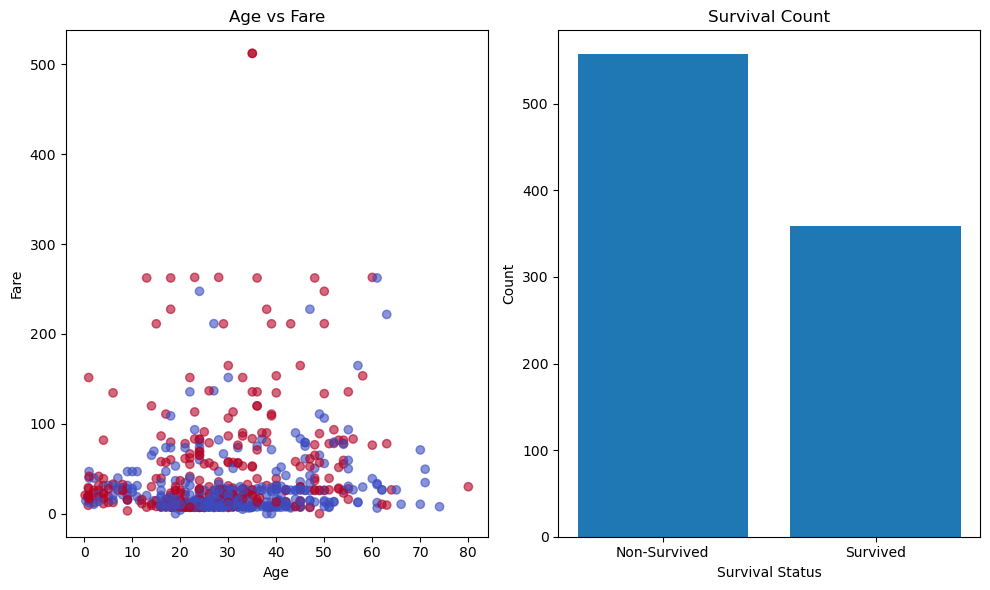

In [47]:
plt.figure(figsize=(10, 6))

# Plotting Age vs Fare scatter plot
plt.subplot(1, 2, 1)
plt.scatter(train['Age'], train['Fare'], c=train['Survival'], cmap='coolwarm', alpha=0.6)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

# Plotting the Survival count bar plot
plt.subplot(1, 2, 2)
survival_counts = train['Survival'].value_counts()
plt.bar(survival_counts.index, survival_counts.values)
plt.title('Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Survived', 'Survived'])

plt.tight_layout()
plt.show()

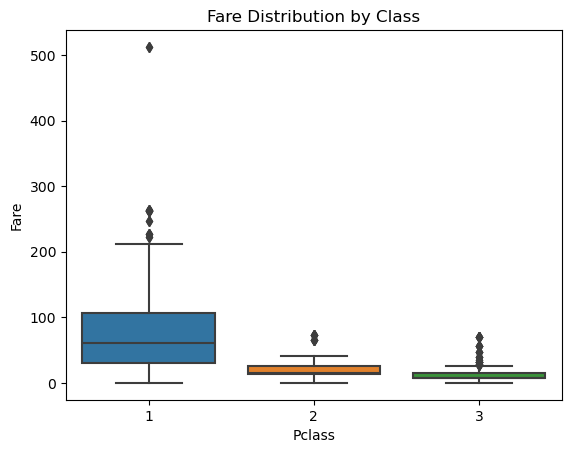

In [48]:
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare Distribution by Class')
plt.show()

- ofc Fare is higher in 1st class

In [22]:
# Check for records where 'Fare' is 0
zero_fare_train = (train['Fare'] == 0).sum()
zero_fare_test = (test['Fare'] == 0).sum()
print(f"Number of records with 'Fare' as 0: {zero_fare_train}")
print(f"Number of records with 'Fare' as 0: {zero_fare_test}")

Number of records with 'Fare' as 0: 10
Number of records with 'Fare' as 0: 7


In [23]:
# Replace 0 values with NaN in the 'Fare' column
train['Fare'] = train['Fare'].replace(0, np.nan)
test['Fare'] = test['Fare'].replace(0, np.nan)

In [24]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [25]:
# Check missing values in train dataset
print("Missing values in Train dataset:")
print(train.isnull().sum())

# Check missing values in test dataset
print("\nMissing values in Test dataset:")
print(test.isnull().sum())

Missing values in Train dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Boat           571
Body           835
Home_Dest      401
Deck             0
FamilySize       0
dtype: int64

Missing values in Test dataset:
PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Boat           252
Body           353
Home_Dest      163
Deck             0
FamilySize       0
dtype: int64


## Age

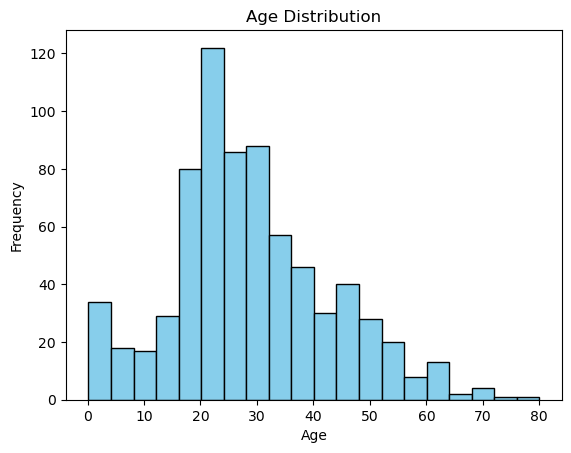

In [53]:
plt.hist(train['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


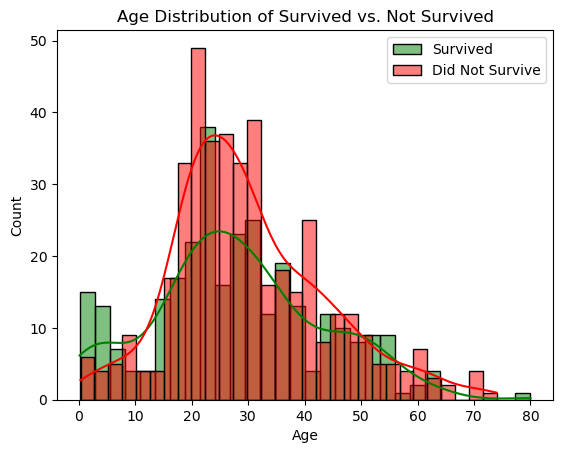

In [54]:
sns.histplot(train[train['Survival'] == 1]['Age'], bins=30, color='green', kde=True, label="Survived")
sns.histplot(train[train['Survival'] == 0]['Age'], bins=30, color='red', kde=True, label="Did Not Survive")
plt.legend()
plt.title('Age Distribution of Survived vs. Not Survived')
plt.show()

- we have more Middle aged passangers and mostly can't survived
- Children have survival rate higher than death.

### Create Title

In [26]:
# Extract honorifics (titles) from the 'Name' column
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [56]:
# Check the unique titles in the dataset
print(train['Title'].value_counts())

Title
Mr          512
Miss        193
Mrs         140
Master       45
Rev           7
Dr            6
Col           2
Mme           1
Sir           1
Major         1
Dona          1
Countess      1
Lady          1
Capt          1
Jonkheer      1
Don           1
Mlle          1
Ms            1
Name: count, dtype: int64


In [57]:
# Check the unique titles in the dataset
print(test['Title'].value_counts())

Title
Mr        245
Miss       67
Mrs        57
Master     16
Dr          2
Col         2
Ms          1
Mlle        1
Rev         1
Major       1
Name: count, dtype: int64


In [58]:
train.groupby('Title')['Age'].median()

Title
Capt        70.0
Col         50.0
Countess    33.0
Don         40.0
Dona        39.0
Dr          49.0
Jonkheer    38.0
Lady        48.0
Major       45.0
Master       6.0
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          29.0
Mrs         34.0
Ms           NaN
Rev         41.0
Sir         49.0
Name: Age, dtype: float64

In [59]:
test.groupby('Title')['Age'].median()

Title
Col       58.0
Dr        43.0
Major     52.0
Master     3.0
Miss      23.5
Mlle      24.0
Mr        30.5
Mrs       38.0
Ms        28.0
Rev       42.0
Name: Age, dtype: float64

In [60]:
train.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.0000,70.0,70.0,70.0,70.0
Col,2.0,50.000000,4.242641,47.0000,48.5,50.0,51.5,53.0
Countess,1.0,33.000000,NaN,33.0000,33.0,33.0,33.0,33.0
Don,1.0,40.000000,NaN,40.0000,40.0,40.0,40.0,40.0
Dona,1.0,39.000000,NaN,39.0000,39.0,39.0,39.0,39.0
Dr,5.0,43.800000,12.070626,23.0000,44.0,49.0,50.0,53.0
Jonkheer,1.0,38.000000,NaN,38.0000,38.0,38.0,38.0,38.0
Lady,1.0,48.000000,NaN,48.0000,48.0,48.0,48.0,48.0
Major,1.0,45.000000,NaN,45.0000,45.0,45.0,45.0,45.0


In [61]:
test.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Col,2.0,58.000000,2.828427,56.0000,57.00,58.0,59.00,60.0
Dr,2.0,43.000000,15.556349,32.0000,37.50,43.0,48.50,54.0
Major,1.0,52.000000,NaN,52.0000,52.00,52.0,52.00,52.0
Master,15.0,4.522227,4.212419,0.4167,1.00,3.0,7.50,13.0
Miss,56.0,24.839286,14.511158,1.0000,15.75,23.5,34.25,58.0
Mlle,1.0,24.000000,NaN,24.0000,24.00,24.0,24.00,24.0
Mr,192.0,32.929688,12.636957,14.0000,23.75,30.5,39.25,70.5
Mrs,51.0,38.313725,14.199282,16.0000,26.50,38.0,46.50,76.0
Ms,1.0,28.000000,NaN,28.0000,28.00,28.0,28.00,28.0


use info for title grouping:
- 0 - Adult Male: Mr, Dr, Col, Capt, Sir, Major, Don, Jonkheer, Rev

- 1 - Young Female: Miss, Mlle

- 2 - Adult Female: Mrs, Mme, Ms

- 3 - Young Male: Master

- 4 - Noble Female: Lady, Countess, Dona

In [27]:
# Map Titles to numeric values
title_mapping = {
    'Mr': 0, 'Dr': 0, 'Col': 0, 'Capt': 0, 'Sir': 0, 'Major': 0, 'Don': 0, 'Jonkheer': 0, 'Rev': 0,  # Adult Male
    'Miss': 1, 'Mlle': 1,  # Young Female
    'Mrs': 2, 'Mme': 2, 'Ms': 2,  # Adult Female
    'Master': 3,  # Young Male
    'Lady': 4, 'Countess': 4, 'Dona': 4  # Noble Female
}

In [28]:
# Apply the mapping to both train and test datasets
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [29]:
print(train['Title'].unique())
print(test['Title'].unique())

[2 0 1 3 4]
[2 0 1 3]


In [65]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Boat,Body,Home_Dest,Deck,FamilySize,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,C,NaN,NaN,"Ottawa, ON",F,2,2
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,244368,13.0000,S,NaN,NaN,"Boston, MA",F,1,0
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,PC 17483,221.7792,S,8,NaN,NaN,C,1,1
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,S,9,NaN,"Sittingbourne, England / San Diego, CA",D,1,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,S,16,NaN,"West Haven, CT",F,2,2


In [30]:
# Fill missing 'Age' values with the median age per title group
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [31]:
# Verify that there are no missing values in 'Age' after filling
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())

0
0


### Exploratory Data Analysis

C:\Users\1\AppData\Local\Temp\ipykernel_8324\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

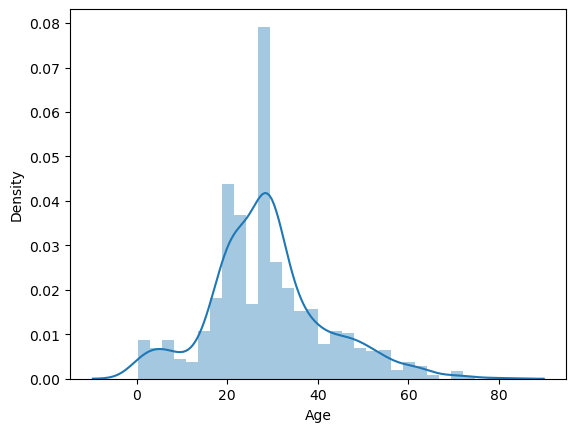

In [68]:
sns.distplot(train['Age'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


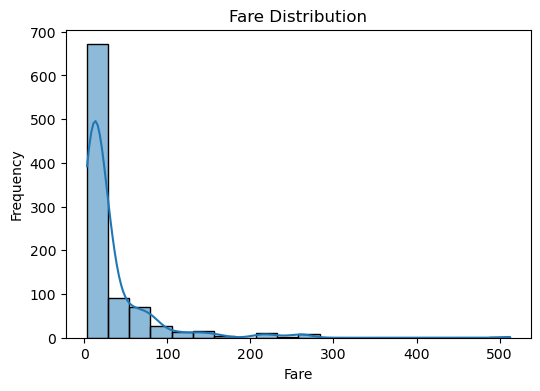

In [69]:
# Fare distribution
plt.figure(figsize=(6, 4))
sns.histplot(train["Fare"], kde=True, bins=20)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

- many passengers paid lower fares, which is expected since most passengers were from 3rd class.
- fare distribution starts very high at the beginning but drops quickly: suggests that cheap tickets were more common, while expensive tickets were less frequent.
- Long tail : distribution is heavily right-skewed, meaning most passengers paid lower fares, but a few paid very high fares, creating a long tail on the right.

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


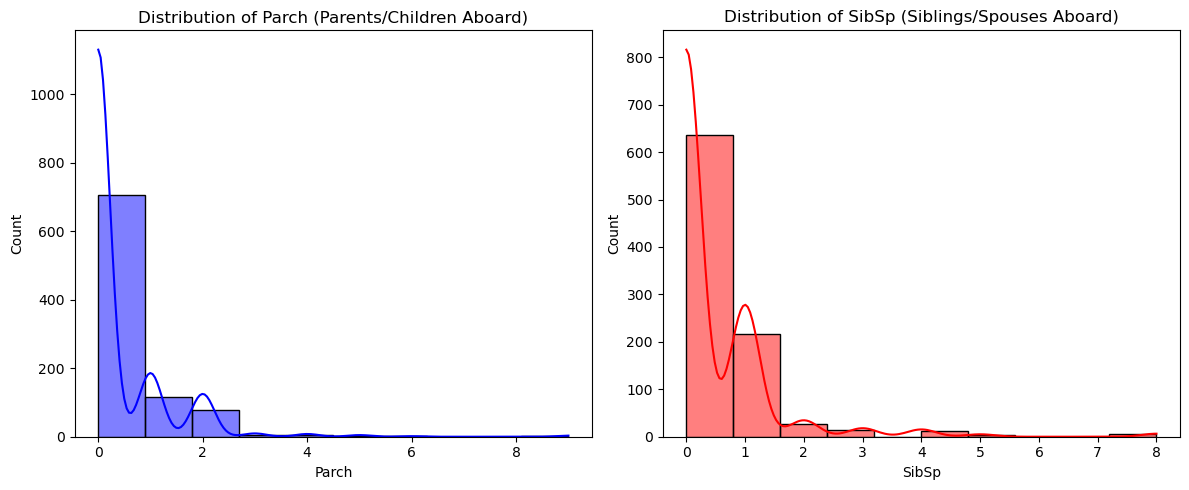

In [70]:
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for Parch
plt.subplot(1, 2, 1)
sns.histplot(train['Parch'], bins=10, kde=True, color='blue')
plt.title('Distribution of Parch (Parents/Children Aboard)')

# Histogram for SibSp
plt.subplot(1, 2, 2)
sns.histplot(train['SibSp'], bins=10, kde=True, color='red')
plt.title('Distribution of SibSp (Siblings/Spouses Aboard)')

# Show the plots
plt.tight_layout()
plt.show()


### Outlier Detection and Data Distribution

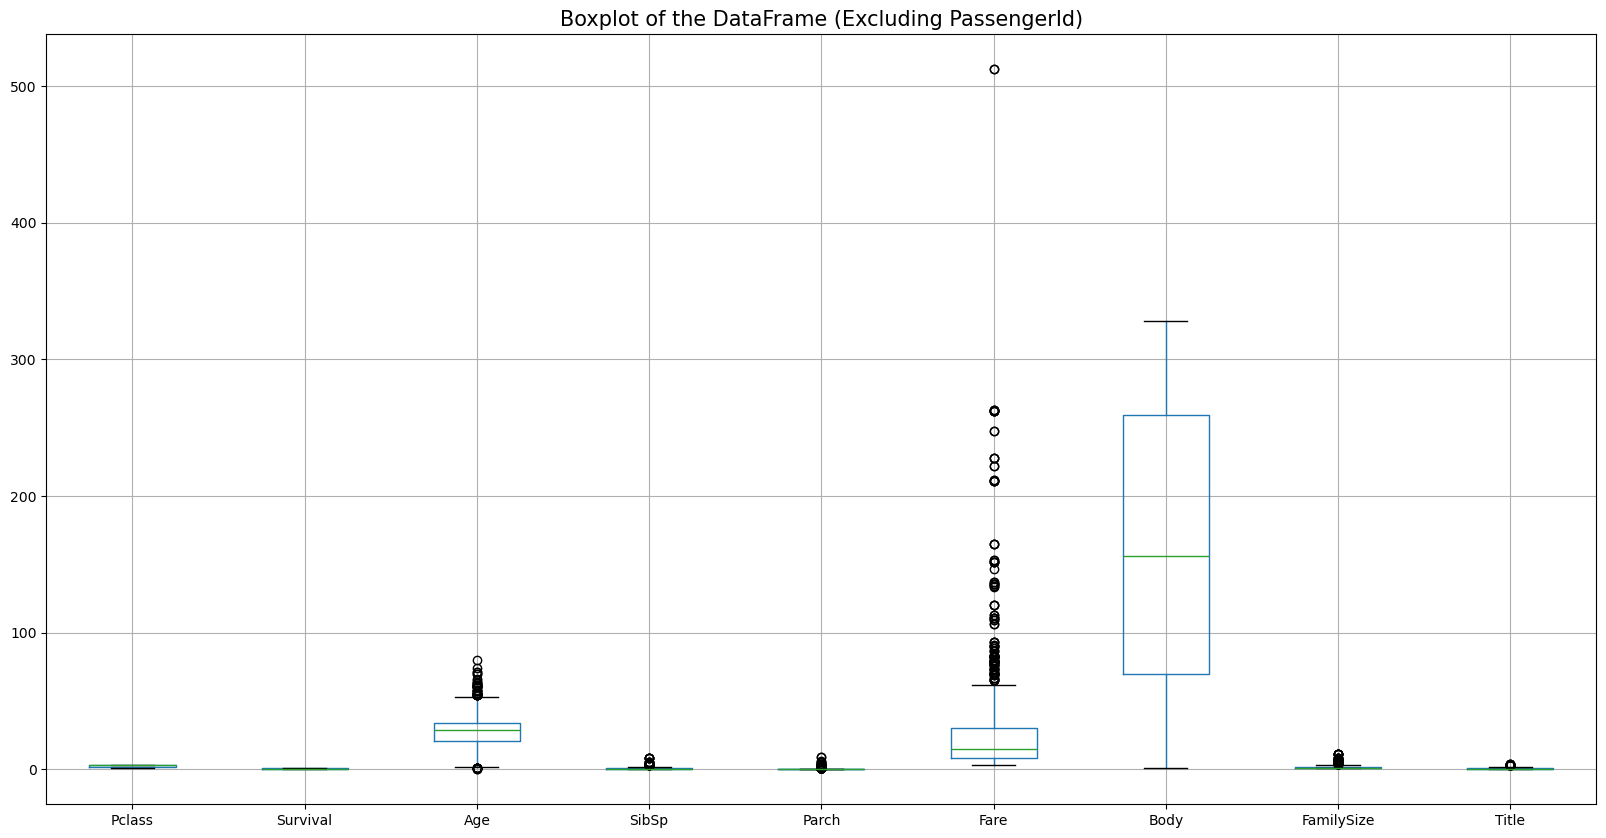

In [71]:
# checking for outliers in dataset
plt.figure(figsize=(20, 10))
train.drop('PassengerId', axis=1).boxplot()
plt.title("Boxplot of the DataFrame (Excluding PassengerId)", fontsize=15)
plt.show()

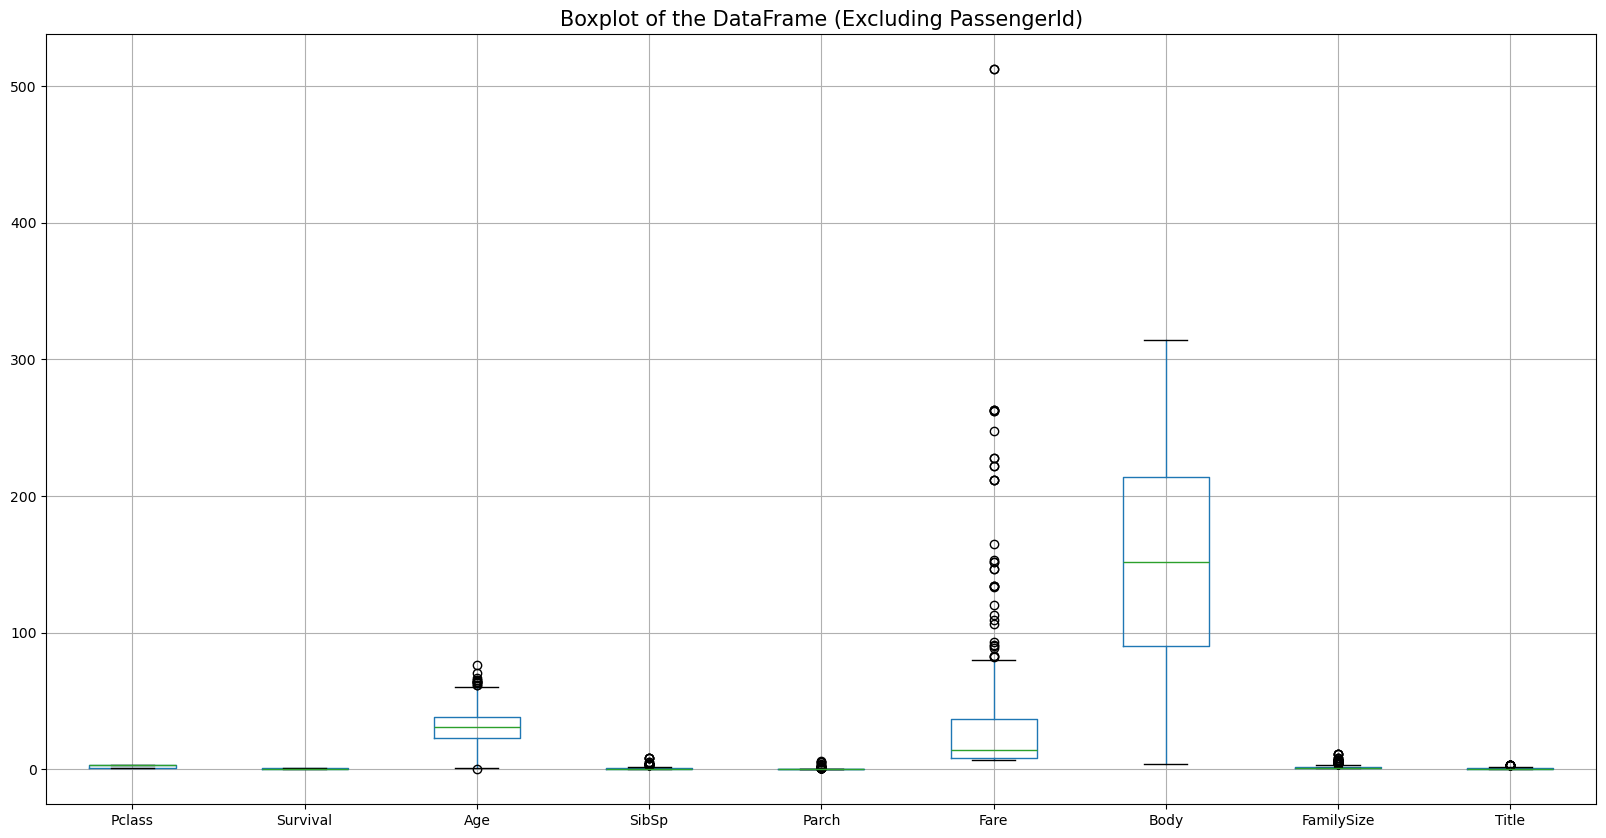

In [72]:
# checking for outliers in dataset
plt.figure(figsize=(20, 10))
test.drop('PassengerId', axis=1).boxplot()
plt.title("Boxplot of the DataFrame (Excluding PassengerId)", fontsize=15)
plt.show()

- outliers in Age and Fare

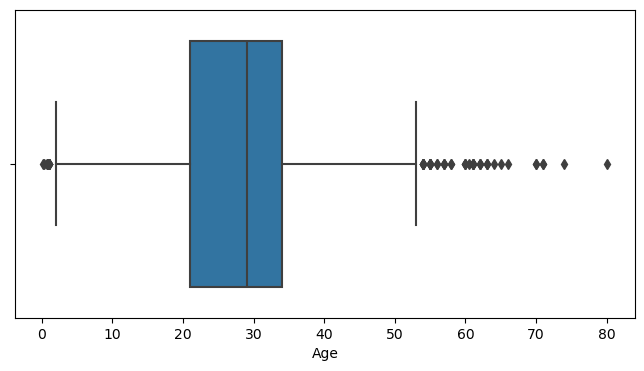

In [74]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train['Age'])
plt.show()

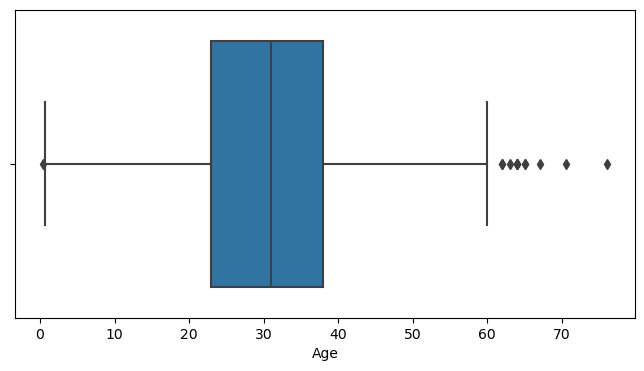

In [75]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=test['Age'])
plt.show()

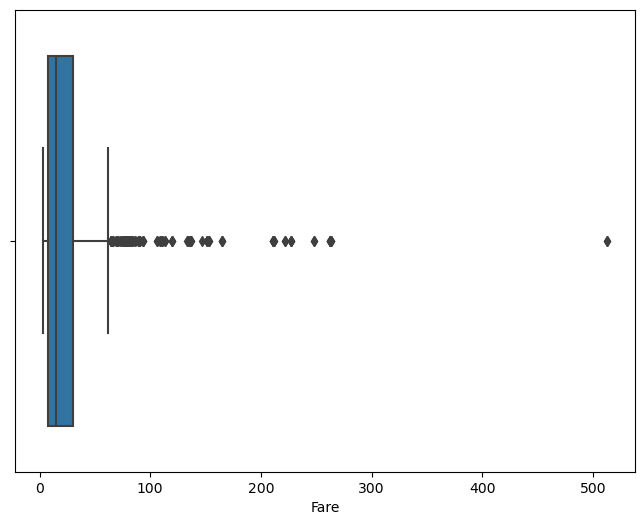

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Fare'])
plt.show()

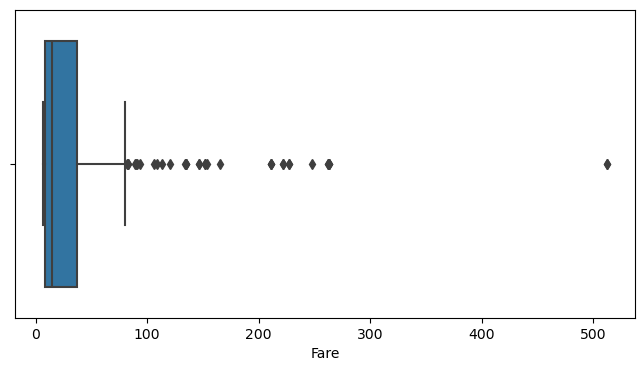

In [77]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=test['Fare'])
plt.show()

In [78]:
# Function to calculate outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First Quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third Quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    # Outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [79]:
# Outliers for Age
age_outliers, age_lower, age_upper = find_outliers(train, "Age")
print(f"Outliers for Age: \n{age_outliers[['Age']]} \n")
print(f"Lower Bound for Age: {age_lower}, Upper Bound for Age: {age_upper}")
print("\n")

# Outliers for Fare
fare_outliers, fare_lower, fare_upper = find_outliers(train, "Fare")
print(f"Outliers for Fare: \n{fare_outliers[['Fare']]} \n")
print(f"Lower Bound for Fare: {fare_lower}, Upper Bound for Fare: {fare_upper}")

Outliers for Age: 
         Age
3    63.0000
26    0.8333
33    0.9167
45    0.1667
47   61.0000
..       ...
847   1.0000
857  54.0000
871   0.7500
895  70.0000
896  71.0000

[61 rows x 1 columns] 

Lower Bound for Age: 1.5, Upper Bound for Age: 53.5


Outliers for Fare: 
         Fare
1     75.2417
3     77.9583
5    110.8833
9    120.0000
16    89.1042
..        ...
857   77.2875
897   76.2917
905  110.8833
910   90.0000
911  146.5208

[122 rows x 1 columns] 

Lower Bound for Fare: -25.937499999999996, Upper Bound for Fare: 64.3625


In [80]:
import scipy.stats as stats

# Compute the Z-score
z_scores = np.abs(stats.zscore(train['Fare']))

# Count how many values have Z-score > 3 (outliers)
outlier_count = (z_scores > 3).sum()

print(f"Number of outliers in 'Fare': {outlier_count}")

Number of outliers in 'Fare': 23


In [81]:
# Compute the Z-score
z_scores1 = np.abs(stats.zscore(train['Age']))

# Count how many values have Z-score > 3 (outliers)
outlier_count1 = (z_scores1 > 3).sum()

print(f"Number of outliers in 'Age': {outlier_count1}")

Number of outliers in 'Age': 6


In [82]:
train[['Fare', 'Age']].skew()

Fare    4.327404
Age     0.510222
dtype: float64

In [83]:
test[['Fare', 'Age']].skew()

Fare    4.268861
Age     0.372652
dtype: float64

- Fare: This is a highly positively skewed distribution.

A skewness above 1 suggests a strong right (positive) skew, meaning that most passengers paid lower fares, but a few paid significantly higher fares, creating a long tail on the right

- Age: This is moderately positively skewed.

A value close to 0.5 suggests that the age distribution is slightly right-skewed, meaning there are more younger passengers, but a few older passengers are pulling the distribution slightly to the right.

# Feature Engineering

### Encoding

Label Encoding (for ordinal categories)

One-Hot Encoding (for non-ordinal categories)

Convert categorical variables(Title, Pclass, Cabin, Embarked, Sex) into numerical form.

#### Sex

In [32]:
# Convert 'Sex' to numeric (Label Encoding: 0 = male, 1 = female)
# Label Encoding for 'Sex' (fit on train, transform on test)
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

#### Deck

In [33]:
train["Deck"].unique()

array(['G', 'C', 'F', 'D', 'B', 'T', 'E', 'N', 'A'], dtype=object)

In [34]:
# Create a dictionary to map cabins to numerical values
cabin_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

# Replace Cabin values with numerical values using the dictionary
train['Deck'] = train['Deck'].map(cabin_mapping)
test['Deck'] = test['Deck'].map(cabin_mapping)

#### Ebarked(One-Hot Encoding)

In [35]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [36]:
# Make a copy of the 'Embarked' column before dropping
embarked_copy_train = train['Embarked'].copy()
embarked_copy_test = test['Embarked'].copy()

In [37]:
# One-Hot Encoding for 'Embarked' in train
embarked_dummies_train = pd.get_dummies(train['Embarked'], prefix='Embarked') 
train = pd.concat([train, embarked_dummies_train], axis=1)
train.drop('Embarked', axis=1, inplace=True)

In [38]:
# Do the same for Test dataset
embarked_dummies_test = pd.get_dummies(test['Embarked'], prefix='Embarked')
test = pd.concat([test, embarked_dummies_test], axis=1)
test.drop('Embarked', axis=1, inplace=True)

In [39]:
# Convert boolean columns to integers (0 and 1)
bool_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
train[bool_columns] = train[bool_columns].astype(int)
test[bool_columns] = test[bool_columns].astype(int)

In [92]:
train.head(3)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Boat,Body,Home_Dest,Deck,FamilySize,Title,Embarked_C,Embarked_Q,Embarked_S
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",1,24.0,0,2,PP 9549,16.7000,13,NaN,NaN,6.0,3,2,0,0,1
1,2,1,0,"McCaffry, Mr. Thomas Francis",0,46.0,0,0,13050,75.2417,NaN,292.0,"Vancouver, BC",2.0,1,0,1,0,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",0,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,NaN,Portugal,5.0,1,0,0,0,1


In [93]:
test.head(3)

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Boat,Body,Home_Dest,Deck,FamilySize,Title,Embarked_C,Embarked_Q,Embarked_S
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",1,38.0,1,0,2689,14.4583,NaN,NaN,"Ottawa, ON",5.0,2,2,1,0,0
1,918,2,0,"Nesson, Mr. Israel",0,26.0,0,0,244368,13.0000,NaN,NaN,"Boston, MA",5.0,1,0,0,0,1
2,919,1,1,"Bird, Miss. Ellen",1,29.0,0,0,PC 17483,221.7792,8,NaN,NaN,2.0,1,1,0,0,1


In [94]:
# Check data types for train and test datasets
print("Data types in train dataset:")
print(train.dtypes)

print("\nData types in test dataset:")
print(test.dtypes)

Data types in train dataset:
PassengerId      int64
Pclass           int64
Survival         int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Boat            object
Body           float64
Home_Dest       object
Deck           float64
FamilySize       int64
Title            int64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
dtype: object

Data types in test dataset:
PassengerId      int64
Pclass           int64
Survival         int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Boat            object
Body           float64
Home_Dest       object
Deck           float64
FamilySize       int64
Title            int64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
dtype: object


### Create Additional Features

#### Age bin

In [40]:
correlation = train[['Age', 'Survival']].corr()
print(correlation)

               Age  Survival
Age       1.000000 -0.070845
Survival -0.070845  1.000000


In [41]:
from scipy.stats import f_oneway

age_survived = train[train['Survival'] == 1]['Age']
age_not_survived = train[train['Survival'] == 0]['Age']

anova_result = f_oneway(age_survived, age_not_survived)
print("ANOVA p-value:", anova_result.pvalue)

ANOVA p-value: 0.03203963453706757


- Even though the correlation was weak (-0.07), the ANOVA test shows a meaningful difference in Age distributions between survivors and non-survivors.

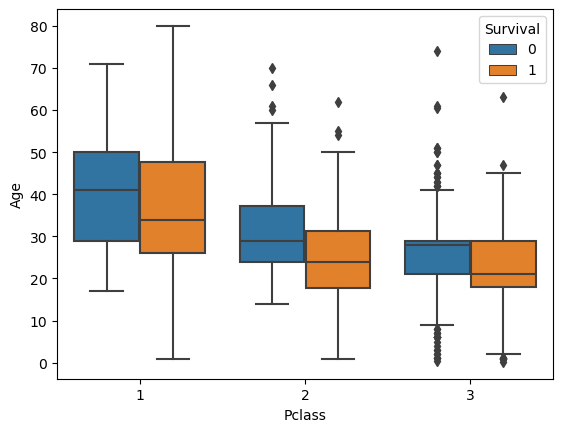

In [97]:
sns.boxplot(x="Pclass", y="Age", hue="Survival", data=train)
plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_8324\1463015962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'])
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

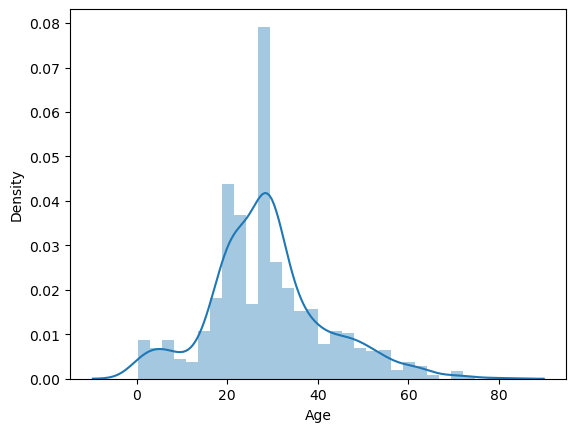

In [98]:
sns.distplot(train['Age'])

In [42]:
# Using qcut to create 5 bins with an equal number of passengers in each bin
age_bins = pd.qcut(train['Age'].dropna(), q=5, duplicates='drop', retbins=True)[1]
age_labels = [0, 1, 2, 3, 4]  # Labels for the 5 age bins

train['AgeBin'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
test['AgeBin'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [43]:
train['AgeBin'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 50, 120], labels=[0, 1, 2, 3, 4])
test['AgeBin'] = pd.cut(test['Age'], bins=[0, 12, 18, 35, 50, 120], labels=[0, 1, 2, 3, 4])

D:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


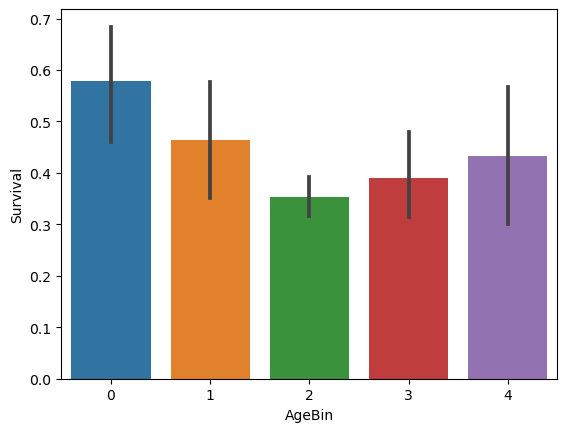

In [101]:
sns.barplot(x=train['AgeBin'], y=train['Survival'])
plt.show()

#### Fare bin

In [44]:
train[['Fare', 'Survival']].corr()

,Fare,Survival
Fare,1.000000,0.248212
Survival,0.248212,1.000000


Fare's Impact on Survival

- Correlation (0.248) → Weak to moderate positive correlation (closer to 0.25)

- ANOVA p-value (2.5e-14) → Extremely significant (<< 0.05)

Conclusion: Fare has a strong impact on survival. Higher fares likely indicate better class & better survival chances.

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


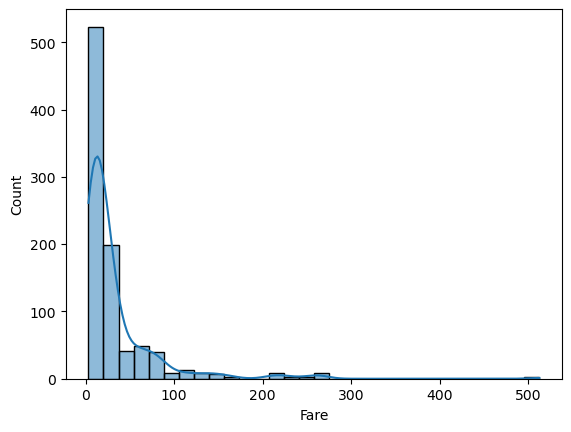

In [103]:
sns.histplot(train['Fare'], bins=30, kde=True)
plt.show()

In [45]:
fare_bins = pd.qcut(train['Fare'], q=4, duplicates='drop', retbins=True)[1]  
fare_labels = [0, 1, 2, 3]  

train['FareBin'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)  
test['FareBin'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

In [46]:
# Convert to numerical values, handling NaNs
train['FareBin'] = train['FareBin'].astype('category').cat.codes + 1
train['AgeBin'] = train['AgeBin'].astype('category').cat.codes + 1
test['FareBin'] = test['FareBin'].astype('category').cat.codes + 1
test['AgeBin'] = test['AgeBin'].astype('category').cat.codes + 1

In [47]:
train.dtypes

PassengerId      int64
Pclass           int64
Survival         int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Boat            object
Body           float64
Home_Dest       object
Deck           float64
FamilySize       int64
Title            int64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
AgeBin            int8
FareBin           int8
dtype: object

#### Drop features

In [48]:
# Store PassengerId separately before dropping it
passenger_ids = test['PassengerId'].copy()

In [49]:
# Drop selected features
drop_cols = ['PassengerId', 'Body', 'Boat', 'Home_Dest', 'Name', 'Ticket']

# Apply to both training and test sets
train_cleaned = train.drop(columns=drop_cols)
test_cleaned = test.drop(columns=drop_cols)

print("Final columns after feature selection:", train_cleaned.columns)

Final columns after feature selection: Index(['Pclass', 'Survival', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Deck',
       'FamilySize', 'Title', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'AgeBin', 'FareBin'],
      dtype='object')


- 'Body', 'Boat' and 'Home_Dest': had a lot missing values.
- 'PassengerId', 'Name' and 'Ticket': object classes and dont help predict target value.

In [50]:
train_cleaned.head(3)

,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Deck,FamilySize,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin
0,3,1,1,24.0,0,2,16.7000,6.0,3,2,0,0,1,3,3
1,1,0,0,46.0,0,0,75.2417,2.0,1,0,1,0,0,4,4
2,3,0,0,38.0,0,0,7.0500,5.0,1,0,0,0,1,4,1


In [51]:
test_cleaned.head(3)

,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Deck,FamilySize,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin
0,3,0,1,38.0,1,0,14.4583,5.0,2,2,1,0,0,4,2
1,2,0,0,26.0,0,0,13.0000,5.0,1,0,0,0,1,3,2
2,1,1,1,29.0,0,0,221.7792,2.0,1,1,0,0,1,3,4


# Feature Selection

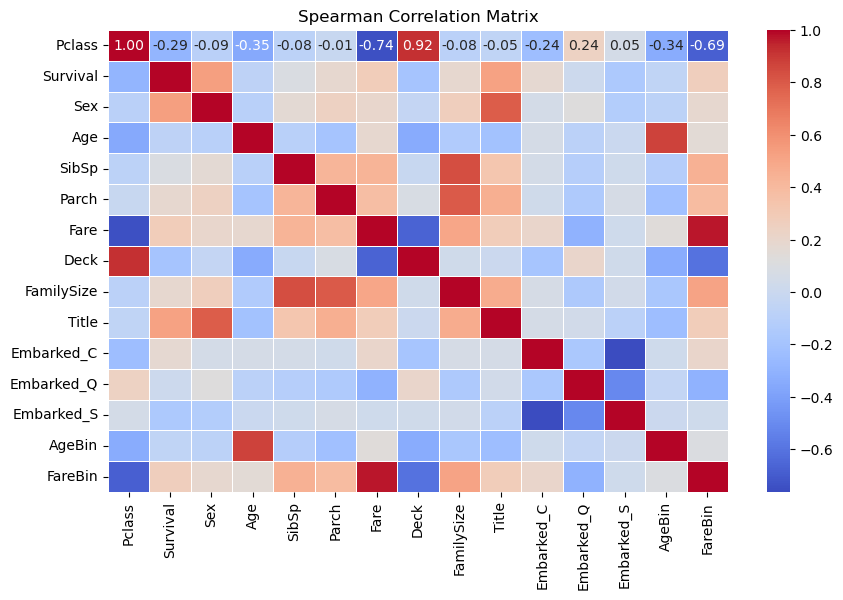

Survival      1.000000
Sex           0.535770
Title         0.521134
Fare          0.279681
FareBin       0.266016
FamilySize    0.186974
Parch         0.186065
Embarked_C    0.173964
SibSp         0.094963
Embarked_Q    0.009982
AgeBin       -0.059391
Age          -0.069415
Embarked_S   -0.157843
Deck         -0.192018
Pclass       -0.287439
Name: Survival, dtype: float64


In [112]:
# Compute Spearman correlation
spearman_corr = train_cleaned.corr(method='spearman')

# Print as a matrix
plt.figure(figsize=(10, 6))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Spearman Correlation Matrix")
plt.show()

# Print correlation values in sorted order
print(spearman_corr["Survival"].sort_values(ascending=False))

In [113]:
# Print correlation matrix with Survived sorted from highest to lowest
print(spearman_corr['Survival'].sort_values(ascending=False))

Survival      1.000000
Sex           0.535770
Title         0.521134
Fare          0.279681
FareBin       0.266016
FamilySize    0.186974
Parch         0.186065
Embarked_C    0.173964
SibSp         0.094963
Embarked_Q    0.009982
AgeBin       -0.059391
Age          -0.069415
Embarked_S   -0.157843
Deck         -0.192018
Pclass       -0.287439
Name: Survival, dtype: float64


Strongest Positive Correlations:
- Sex (0.535770) → Women were more likely to survive.
- Title (0.521134) → Certain titles (e.g., "Miss" and "Mrs") likely indicate higher survival rates.
- Fare (0.279681) → Higher ticket prices were associated with higher survival chances.
- FamilySize (0.186974), Parch (0.186065) → Having family members on board had a slight positive impact.

Strongest Negative Correlations:
- Pclass (-0.287439) → Higher-class passengers had a better survival rate.
- Deck (-0.192018) → Passengers in lower decks were less likely to survive.
- Embarked_S (-0.157843) → Those who embarked from 'S' had a lower survival rate.

Weak or Insignificant Correlations:
- Embarked_Q (0.009982) → Barely any effect on survival.
- AgeBin (-0.059391), Age (-0.069415) → Weak negative correlation, meaning younger passengers might have had a slightly better survival rate.

### Anova(categorical features)

In [114]:
from scipy import stats
# ANOVA test for Pclass
f_statistic_pclass, p_value_pclass = stats.f_oneway(train_cleaned[train_cleaned['Survival'] == 0]['Pclass'],
                                                    train_cleaned[train_cleaned['Survival'] == 1]['Pclass'])
print(f"F-statistic for Pclass: {f_statistic_pclass}")
print(f"P-value for Pclass: {p_value_pclass}")

F-statistic for Pclass: 84.0027777746339
P-value for Pclass: 3.183865693697878e-19


In [115]:
# ANOVA test for Title
f_statistic_title, p_value_title = stats.f_oneway(train_cleaned[train_cleaned['Survival'] == 0]['Title'],
                                                  train_cleaned[train_cleaned['Survival'] == 1]['Title'])
print(f"F-statistic for Title: {f_statistic_title}")
print(f"P-value for Title: {p_value_title}")

F-statistic for Title: 245.94800597794884
P-value for Title: 2.8867416321521302e-49


- p-values for Pclass and Title are extremely small, both being far below 0.05. This means that both Pclass and Title are highly significant factors in determining survival.

In [116]:
# ANOVA test for Embarked_Q
f_statistic_embarked_q, p_value_embarked_q = stats.f_oneway(train_cleaned[train_cleaned['Survival'] == 0]['Embarked_Q'],
                                                           train_cleaned[train_cleaned['Survival'] == 1]['Embarked_Q'])
print(f"F-statistic for Embarked_Q: {f_statistic_embarked_q}")
print(f"P-value for Embarked_Q: {p_value_embarked_q}")

# ANOVA test for Embarked_C
f_statistic_embarked_c, p_value_embarked_c = stats.f_oneway(train_cleaned[train_cleaned['Survival'] == 0]['Embarked_C'],
                                                           train_cleaned[train_cleaned['Survival'] == 1]['Embarked_C'])
print(f"F-statistic for Embarked_C: {f_statistic_embarked_c}")
print(f"P-value for Embarked_C: {p_value_embarked_c}")

# ANOVA test for Embarked_S
f_statistic_embarked_s, p_value_embarked_s = stats.f_oneway(train_cleaned[train_cleaned['Survival'] == 0]['Embarked_S'],
                                                           train_cleaned[train_cleaned['Survival'] == 1]['Embarked_S'])
print(f"F-statistic for Embarked_S: {f_statistic_embarked_s}")
print(f"P-value for Embarked_S: {p_value_embarked_s}")

F-statistic for Embarked_Q: 0.09107462629235842
P-value for Embarked_Q: 0.7628840614517904
F-statistic for Embarked_C: 28.52416597600477
P-value for Embarked_C: 1.1683641342404209e-07
F-statistic for Embarked_S: 23.35358441858802
P-value for Embarked_S: 1.5803697372815287e-06


- Embarked_Q is not a significant predictor for survival.

- Embarked_C and Embarked_S are all highly significant features.

### t-test(continuous features) 
to check if the means of the two groups (Survived vs. Not Survived) are significantly different.

In [94]:
# T-test for Age
t_stat_age, p_value_age = stats.ttest_ind(train_cleaned[train_cleaned['Survival'] == 0]['Age'].dropna(),
                                          train_cleaned[train_cleaned['Survival'] == 1]['Age'].dropna())
print(f"P-value for Age: {p_value_age}")

# T-test for Fare
t_stat_fare, p_value_fare = stats.ttest_ind(train_cleaned[train_cleaned['Survival'] == 0]['Fare'].dropna(),
                                           train_cleaned[train_cleaned['Survival'] == 1]['Fare'].dropna())
print(f"P-value for Fare: {p_value_fare}")

# T-test for FamilySize
t_stat_family_size, p_value_family_size = stats.ttest_ind(train_cleaned[train_cleaned['Survival'] == 0]['FamilySize'].dropna(),
                                                          train_cleaned[train_cleaned['Survival'] == 1]['FamilySize'].dropna())
print(f"P-value for FamilySize: {p_value_family_size}")


P-value for Age: 0.03203963453707747
P-value for Fare: 2.505844641200752e-14
P-value for FamilySize: 0.10704845412493953


- Age and Fare show significant differences between the Survived and Not Survived groups.

- -FamilySize does not show a significant difference.

### Chi-Square test (for categorical features) 
The Chi-Square test evaluates if there is a statistically significant association between two categorical variables.

In [123]:
from scipy.stats import chi2_contingency

# Chi-Square test for FareBin
contingency_farebin = pd.crosstab(train_cleaned['Survival'], train_cleaned['FareBin'])
chi2_farebin, p_farebin, dof_farebin, expected_farebin = chi2_contingency(contingency_farebin)
print(f"P-value for FareBin: {p_farebin}")

# Chi-Square test for AgeBin
contingency_agebin = pd.crosstab(train_cleaned['Survival'], train_cleaned['AgeBin'])
chi2_agebin, p_agebin, dof_agebin, expected_agebin = chi2_contingency(contingency_agebin)
print(f"P-value for AgeBin: {p_agebin}")

P-value for FareBin: 2.5701015242383175e-15
P-value for AgeBin: 0.002246423894370548


In [124]:
# T-test for Parch
t_stat_parch, p_value_parch = stats.ttest_ind(train_cleaned[train_cleaned['Survival'] == 0]['Parch'].dropna(),
                                              train_cleaned[train_cleaned['Survival'] == 1]['Parch'].dropna())
print(f"P-value for Parch: {p_value_parch}")

# T-test for SibSp
t_stat_sibsp, p_value_sibsp = stats.ttest_ind(train_cleaned[train_cleaned['Survival'] == 0]['SibSp'].dropna(),
                                              train_cleaned[train_cleaned['Survival'] == 1]['SibSp'].dropna())
print(f"P-value for SibSp: {p_value_sibsp}")

P-value for Parch: 0.0010788204974115456
P-value for SibSp: 0.6772764197984127


- FareBin, AgeBin, and Parch has significant relationship with survival.

- SibSp can likely be removed, as it does not contribute to explaining survival significantly.

In [125]:
# Chi-Square Test for Sex
contingency_sex = pd.crosstab(train['Survival'], train['Sex'])
chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex)
print(f"P-value for Sex: {p_sex}")

P-value for Sex: 1.2253928858311242e-58


- Both Sex and Has_Cabin are highly significant predictors of survival on the Titanic.

In [117]:
# Checking the correlation between FamilySize, Parch, and SibSp
corr_matrix = train_cleaned[['FamilySize', 'Parch', 'SibSp']].corr()
corr_matrix

,FamilySize,Parch,SibSp
FamilySize,1.000000,0.799517,0.841853
Parch,0.799517,1.000000,0.348905
SibSp,0.841853,0.348905,1.000000


- Since FamilySize is highly correlated with both Parch and SibSp, i might drop one of Parch or SibSp to avoid multicollinearity and reduce redundancy in the model.

In [118]:
# Check correlation between Age and AgeBin
corr_age_agebin = train_cleaned[['Age', 'AgeBin']].corr()
corr_age_agebin

,Age,AgeBin
Age,1.000000,0.929835
AgeBin,0.929835,1.000000


- Since AgeBin already encapsulates the age information and is highly correlated with Age, including both features in a model might introduce redundancy.

In [119]:
# Correlation for continuous variable (Fare) and categorical (FareBin)
corr = train['Fare'].corr(train['FareBin'])
print(f"Correlation between Fare and FareBin: {corr}")

Correlation between Fare and FareBin: 0.5923619999635109


- Since FareBin is derived from Fare (likely by categorizing it into bins), a strong correlation is expected.
- This means that FareBin still captures Fare trends, but some information is lost due to grouping into bins.

In [120]:
corr_matrix_e = train[['Embarked_C', 'Embarked_S', 'Embarked_Q']].corr()
corr_matrix_e

,Embarked_C,Embarked_S,Embarked_Q
Embarked_C,1.000000,-0.762302,-0.163677
Embarked_S,-0.762302,1.000000,-0.513722
Embarked_Q,-0.163677,-0.513722,1.000000


Keep Embarked_C and Embarked_S, and drop Embarked_Q as it has a lower correlation with the others and is somewhat less important for distinguishing survival.

In [121]:
train_cleaned.head(2)

,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Deck,FamilySize,Title,Embarked_C,Embarked_Q,Embarked_S,AgeBin,FareBin
0,3,1,1,24.0,0,2,16.7000,6.0,3,2,0,0,1,3,3
1,1,0,0,46.0,0,0,75.2417,2.0,1,0,1,0,0,4,4


### Future selection

#### selected features for v1

In [129]:
# Drop selected features
drop_columns = ['Fare', 'Age', 'SibSp', 'Parch','Deck', 'Embarked_Q']

# Apply to both training and test sets
c_train = cleaned_train.drop(columns=drop_columns)
c_test = cleaned_test.drop(columns=drop_columns)

### selected features for Selected variant

In [132]:
# Drop selected features
drop_columns = ['Fare', 'Age', 'SibSp','Deck', 'Embarked_Q', 'FamilySize']

# Apply to both training and test sets
clnd_train = train_cleaned.drop(columns=drop_columns)
clnd_test = test_cleaned.drop(columns=drop_columns)

Not Significant (p > 0.05, weak evidence)
- Embarked_Q (0.76) → No real effect on survival.
- SibSp (0.68) → Number of siblings/spouses doesn’t significantly impact survival.
- FamilySize (0.107) → Borderline insignificant, meaning family size alone may not be a strong predictor.

In [133]:
clnd_train.head(3)

,Pclass,Survival,Sex,Parch,Title,Embarked_C,Embarked_S,AgeBin,FareBin
0,3,1,1,2,2,0,1,3,3
1,1,0,0,0,0,1,0,4,4
2,3,0,0,0,0,0,1,4,1


In [134]:
clnd_test.head(3)

,Pclass,Survival,Sex,Parch,Title,Embarked_C,Embarked_S,AgeBin,FareBin
0,3,0,1,0,2,1,0,4,2
1,2,0,0,0,0,0,1,3,2
2,1,1,1,0,1,0,1,3,4


# Model Development

### Logistic Regression

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f'--- {model_name} Performance ---')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.4f}')
    print('\n')

In [136]:
# Step 1: Prepare the Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### variant1

In [134]:
# Define features and target variable
X_train_v1 = c_train.drop(columns=['Survival'])
y_train_v1 = c_train['Survival']
X_test_v1 = c_test.drop(columns=['Survival'])
y_test_v1 = c_test['Survival']

In [135]:
# Standardizing the features for Logistic Regression
scaler = StandardScaler()
X_train_v1_scaled = scaler.fit_transform(X_train_v1)
X_test_v1_scaled = scaler.transform(X_test_v1)

# Train the Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_v1_scaled, y_train_v1)

# Make Predictions and Evaluate the Model
y_pred_log_v1 = log_reg.predict(X_test_v1_scaled)

# Evaluate Logistic model
evaluate_model(y_test_v1, y_pred_log_v1, "Logistic Regression")

--- Logistic Regression Performance ---
Accuracy: 0.8244
Precision: 0.7951
Recall: 0.6879
F1 Score: 0.7376




# Selected Model (Logistic Regression)

In [137]:
# Define features and target variable
X_train_v3 = clnd_train.drop(columns=['Survival'])
y_train_v3 = clnd_train['Survival']
X_test_v3 = clnd_test.drop(columns=['Survival'])
y_test_v3 = clnd_test['Survival']

In [138]:
# Standardizing the features for Logistic Regression
scaler = StandardScaler()
X_train_v3_scaled = scaler.fit_transform(X_train_v3)
X_test_v3_scaled = scaler.transform(X_test_v3)

# Train the Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_v3_scaled, y_train_v3)

# Make Predictions and Evaluate the Model
y_pred_log_v3 = log_reg.predict(X_test_v3_scaled)

# Evaluate Logistic model
evaluate_model(y_test_v3, y_pred_log_v3, "Logistic Regression")

--- Logistic Regression Performance ---
Accuracy: 0.8193
Precision: 0.7823
Recall: 0.6879
F1 Score: 0.7321




- model correctly predicted survival or non-survival for 81.7% of passengers.
- model correctly predicted that about 78% of those identified as survivors actually survived.
- model correctly identified 68% of the passengers who actually survived.
- F1 score is the harmonic mean of precision and recall.

In [139]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test_v3, y_pred_log_v3)
print(f'Confusion Matrix:\n {cm}')

Confusion Matrix:
 [[225  27]
 [ 44  97]]


- True Negatives (TN = 225) → Correctly predicted passengers who did not survive.
- False Positives (FP = 27) → Incorrectly predicted some passengers as survived when they did not.
- False Negatives (FN = 44) → Incorrectly predicted some passengers as not survived when they actually did.
- True Positives (TP = 97) → Correctly predicted passengers who survived.

# XGBoost

In [55]:
# XGBoost Model
X_train_xgb = train_cleaned.drop(columns=['Survival'])
y_train_xgb = train_cleaned['Survival']
X_test_xgb = test_cleaned.drop(columns=['Survival'])
y_test_xgb = test_cleaned['Survival']

xgb = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss',
    scale_pos_weight=1.2, learning_rate=0.05, max_depth=4, n_estimators=200
)
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = xgb.predict(X_test_xgb)

# Evaluate XGboost model
evaluate_model(y_test_xgb, y_pred_xgb, "XGBoost")

--- XGBoost Performance ---
Accuracy: 0.8270
Precision: 0.8174
Recall: 0.6667
F1 Score: 0.7344




D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:16:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


- model correctly predicted survival or non-survival for 82.7% of passengers.
- model correctly predicted that about 82% of those identified as survivors actually survived.
- model correctly identified 66.67% of the passengers who actually survived, but missed about 33% of them.
- F1 score is the harmonic mean of precision and recall.

In [56]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 150, 200, 250, 300],
    'scale_pos_weight': np.linspace(1.0, 2.0, 5)
}

random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                                   param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_xgb, y_train_xgb)

print(random_search.best_params_)

D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\sit

D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\sit

D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\sit

{'scale_pos_weight': 1.25, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01}


D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
D:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:17:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [57]:
!pip install scikit-optimize

   ---------------------------------------- 0.0/107.8 kB ? eta -:--:--
   ----------- --------------------------- 30.7/107.8 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 107.8/107.8 kB 1.3 MB/s eta 0:00:00


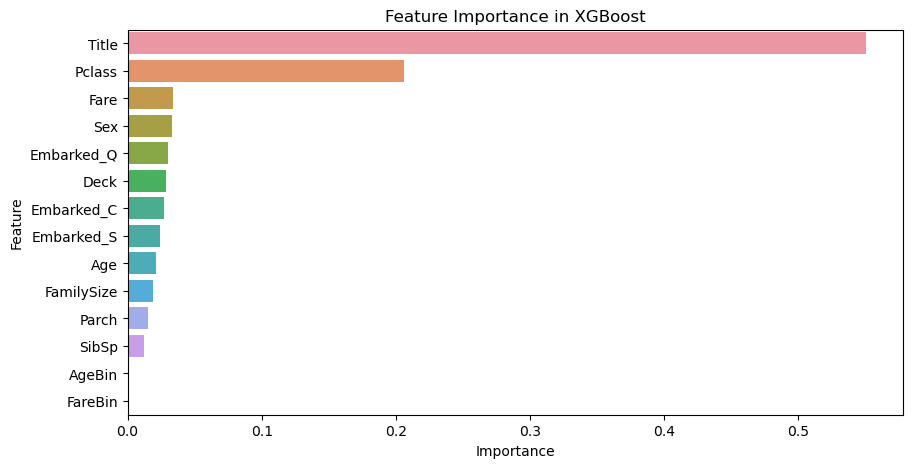

In [59]:
#Check Feature Importance in XGBoost

feature_importances = pd.DataFrame({'Feature': X_train_xgb.columns, 'Importance': xgb.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in XGBoost')
plt.show()

In [61]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test_xgb, y_pred_xgb)
print(f'Confusion Matrix:\n {cm}')

Confusion Matrix:
 [[231  21]
 [ 47  94]]


- True Negatives (TN = 231) → Correctly predicted passengers who did not survive.
- False Positives (FP = 21) → Incorrectly predicted some passengers as survived when they did not.
- False Negatives (FN = 47) → Incorrectly predicted some passengers as not survived when they actually did.
- True Positives (TP = 94) → Correctly predicted passengers who survived.

### Logistic Regression provided a reliable and robust performance, balancing both precision and recall reasonably well. also it is easier to interpret and provide a clear understanding for me

# Generate Submission File

In [160]:
test_predictions_3 = log_reg.predict(X_test_v3_scaled) 

In [161]:
# Ensure predictions are binary (0 or 1)
test_predictions_3 = (test_predictions_3 > 0.5).astype(int)  # If probabilities are returned

In [162]:
# Create the submission DataFrame
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survival': test_predictions_3})

# Save the submission file
submission.to_csv('submission_v3.csv', index=False)

print("Submission file has been created successfully!")

Submission file has been created successfully!
